# Lagrange interpolation

In this notebook, we will explore Lagrange interpolation. Lagrange polynomials can be written as $$f(x)=\sum_{i=0}^{n-1}l_i(x)f_i$$ 
where $f_i$ is the function evaluated at $x_i$, and
$$l_{i}(x)=\prod_{j=0,i\neq j}^{n-1} \frac{x-x_j}{x_i-x_j}.$$

## Quadratic Lagrange polynomial

As discussed in the lecture notes, the basis functions for the quadratic Lagrange polynomial are:

$$l_0=\frac{x-x_1}{x_0-x_1}\frac{x-x_2}{x_0-x_2}=\frac{(x-x_1)(x-x_2)}{2\Delta x^2}$$ 
$$ l_1=\frac{x-x_0}{x_1-x_0}\frac{x-x_2}{x_1-x_2}=-\frac{(x-x_0)(x-x_2)}{\Delta x^2}$$ 
$$ l_2=\frac{x-x_0}{x_2-x_0}\frac{x-x_1}{x_2-x_1}=\frac{(x-x_0)(x-x_1)}{2\Delta x^2}$$

So the polynomial is:

$$f(x)=f_0\frac{(x-x_1)(x-x_2)}{2\Delta x^2}-f_1\frac{(x-x_0)(x-x_2)}{\Delta x^2} +f_2\frac{(x-x_0)(x-x_1)}{2\Delta x^2}$$

Lets plot an example and see what it looks like:



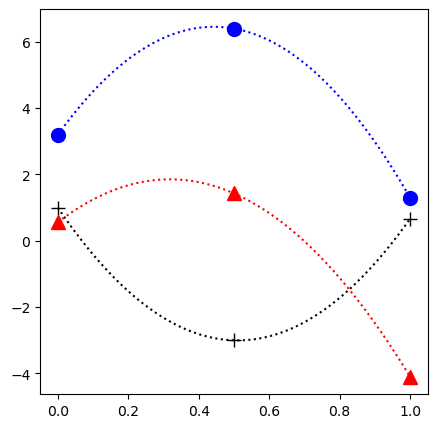

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_poly(x, xi, fi):
    """
    Calculate the value of the quadratic Lagrange polynomial at x.
    xi and fi are the points and function evalueated at those points.
    """
    
    # We assume that points are equally spaced and ordered
    invDxSq=1.0/(xi[1]-xi[0])**2
    
    
    return (invDxSq*(0.5*fi[0]*(x-xi[1])*(x-xi[2]) \
                            -fi[1]*(x-xi[0])*(x-xi[2]) \
                            +0.5*fi[2]*(x-xi[0])*(x-xi[1])))
  
# Some random points
x = np.array([0.0, 0.5, 1.0])
xGrid = np.linspace(0.0, 1.0, 200)

f = np.array([1.0, -3.0, 2.0/3.0])
g = np.array([3.2,6.4,1.3])
h = np.array([0.56,1.43,-4.1])

# Now lets plot it:
fig1,ax1= plt.subplots(figsize=(5,5))

ax1.plot(x,f,'k+',markersize=10)
ax1.plot(x,g,'bo',markersize=10)
ax1.plot(x,h,'r^',markersize=10)

ax1.plot(xGrid,lagrange_poly(xGrid,x,f),'k:')
ax1.plot(xGrid,lagrange_poly(xGrid,x,g),'b:')
ax1.plot(xGrid,lagrange_poly(xGrid,x,h),'r:')

plt.show()


## General implementation

Now lets make a more general implementation of the Lagrange polynomial for order $n$.

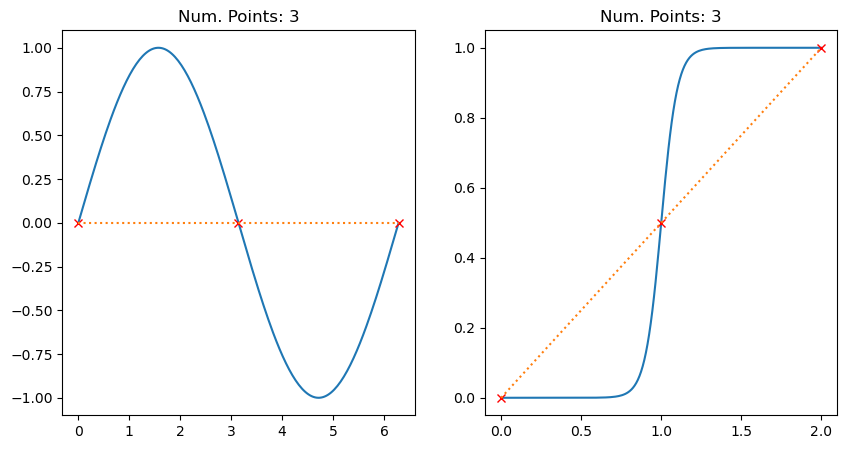

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sine_test(x):
    """ a sine test function """
    return np.sin(x)

def tanh_test(x):
    """ a tanh test function """
    return 0.5*(1.0+np.tanh((x-1.0)/0.1))


class LagrangePoly:
    """ Class for constructing a Lagrange polynomial """
    
    def __init__(self,npts=3,xmin=0.0,xmax=1.0,func=None):
        self.npts=npts
        self.xmin=xmin
        self.xmax=xmax
        self.func=func
        
        self.xi = self.get_interp_pts()
        self.fi = func(self.xi)

        
    def get_interp_pts(self):
        """ get the x points where we interpolate """
        
        return np.linspace(self.xmin, self.xmax, self.npts)
        
   
    def lagrange_poly(self,x):
        """
        Calculate the value of the Lagrange polynomial at x.
        xi and fi are the points and function evaluated at those points.
        """

        f=0.0
        
        for i in range(0,self.npts):
        
            # Evaluate the basis function
            basisL=1.0
            for j in range(0,self.npts):
                
                if i != j:
                    basisL *= (x-self.xi[j])/(self.xi[i]-self.xi[j])
            
            # Add to polynomial
            f+=self.fi[i]*basisL
    
        return f


def main():
    
    # Some parameters:
    npts = 3  # must be >= 3

    xminSin = 0.0
    xmaxSin = 2.0*np.pi
    
    xminTanh = 0.0
    xmaxTanh = 2.0
    
    # First lets get out functions of a very fine grid for plotting:
    xPlotSin=np.linspace(xminSin,xmaxSin,200)
    fPlotSin=sine_test(xPlotSin)
    xPlotTanh=np.linspace(xminTanh,xmaxTanh,200)
    fPlotTanh=tanh_test(xPlotTanh)
    
    # Now Evaluate the Lagrange Polynomials with the chosen number of points 
    lagrangeSin = LagrangePoly(npts, xminSin, xmaxSin, func=sine_test)
    lagrangeTanh = LagrangePoly(npts, xminTanh, xmaxTanh, func=tanh_test)

    # Plot it!
    fig2,(ax21,ax22)= plt.subplots(1,2,figsize=(10,5))  
    
    # Exact function
    ax21.plot(xPlotSin,fPlotSin,label='Function')
    ax22.plot(xPlotTanh,fPlotTanh,label='Function')
    
    # Points used in interpolation
    ax21.plot(lagrangeSin.xi,lagrangeSin.fi,'rx',label='Points for interpolation')
    ax22.plot(lagrangeTanh.xi,lagrangeTanh.fi,'rx',label='Points for interpolation')
    
    # Interpolation
    ax21.plot(xPlotSin,lagrangeSin.lagrange_poly(xPlotSin),':',label='Interpolation')
    ax22.plot(xPlotTanh,lagrangeTanh.lagrange_poly(xPlotTanh),':',label='Interpolation')
    
    ax21.set_title('Num. Points: '+str(npts))
    ax22.set_title('Num. Points: '+str(npts))
    
    plt.savefig('lag_poly_int_'+str(npts)+'.pdf',bbox_inches='tight')
    plt.show()
    
if __name__ == "__main__":
    main()


# Chebyshev nodes to avoid Runge phenomena

If the number of points is increased, the hyperbolic tangent function experiences large errors at the edges. We can avoid this "Runge phenomenon" by using Chebyshev nodes instead of equally-spaced points

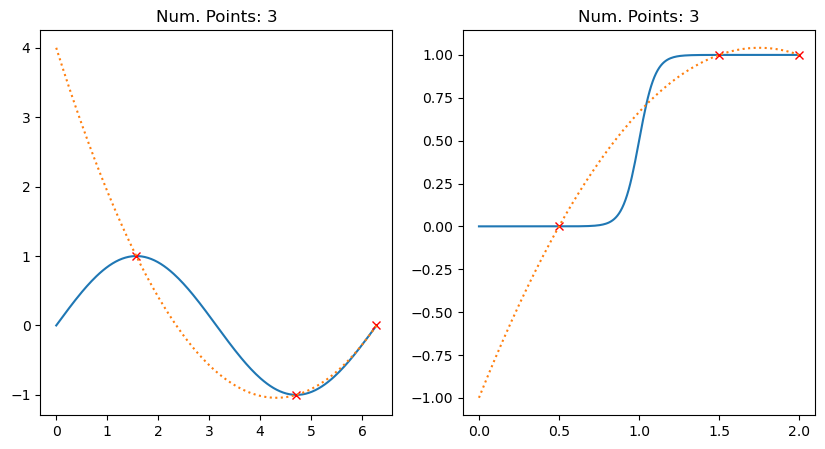

In [9]:
class LagrangePolyCheby:
    """ Class for constructing a Lagrange polynomial """
    
    def __init__(self,npts=3,xmin=0.0,xmax=1.0,func=None):
        self.npts=npts
        self.xmin=xmin
        self.xmax=xmax
        self.func=func
        
        self.xi = self.get_interp_pts()
        self.fi = func(self.xi)

        
    def get_interp_pts(self):
        """ get the x points where we interpolate """
        
        return 0.5*(self.xmin + self.xmax) + \
                0.5*(self.xmax - self.xmin)*np.cos(2.0*np.arange(self.npts)*np.pi/(2*self.npts))
        
   
    def lagrange_poly(self,x):
        """
        Calculate the value of the Lagrange polynomial at x.
        xi and fi are the points and function evalueated at those points.
        """

        f=0.0
        
        for i in range(0,self.npts):
        
            # Evaluate the basis function
            basisL=1.0
            for j in range(0,self.npts):
                
                if i != j:
                    basisL *= (x-self.xi[j])/(self.xi[i]-self.xi[j])
            
            # Add to polynomial
            f+=self.fi[i]*basisL
    
        return f


def main():
    
    # Some parameters:
    npts = 3 # must be >= 3

    xminSin = 0.0
    xmaxSin = 2.0*np.pi
    
    xminTanh = 0.0
    xmaxTanh = 2.0
    
    # First lets get out functions of a very fine grid for plotting:
    xPlotSin=np.linspace(xminSin,xmaxSin,200)
    fPlotSin=sine_test(xPlotSin)
    xPlotTanh=np.linspace(xminTanh,xmaxTanh,200)
    fPlotTanh=tanh_test(xPlotTanh)
    
    # Now Evaluate the Lagrange Polynomials with the chosen number of points 
    lagrangeSin = LagrangePolyCheby(npts, xminSin, xmaxSin, func=sine_test)
    lagrangeTanh = LagrangePolyCheby(npts, xminTanh, xmaxTanh, func=tanh_test)

    # Plot it!
    fig2,(ax21,ax22)= plt.subplots(1,2,figsize=(10,5))  
    
    # Exact function
    ax21.plot(xPlotSin,fPlotSin,label='Function')
    ax22.plot(xPlotTanh,fPlotTanh,label='Function')
    
    # Points used in interpolation
    ax21.plot(lagrangeSin.xi,lagrangeSin.fi,'rx',label='Points for interpolation')
    ax22.plot(lagrangeTanh.xi,lagrangeTanh.fi,'rx',label='Points for interpolation')
    
    # Interpolation
    ax21.plot(xPlotSin,lagrangeSin.lagrange_poly(xPlotSin),':',label='Interpolation')
    ax22.plot(xPlotTanh,lagrangeTanh.lagrange_poly(xPlotTanh),':',label='Interpolation')
    
    ax21.set_title('Num. Points: '+str(npts))
    ax22.set_title('Num. Points: '+str(npts))
    
    plt.savefig('lag_poly_cheb_int_'+str(npts)+'.pdf',bbox_inches='tight')
    plt.show()
    
if __name__ == "__main__":
    main()
